## Evaluation of STT models

Load the benchmark dataset from huggingface

In [50]:
from datasets import load_dataset
import pandas as pd
dataset = load_dataset("openpecha/tibetan-voice-benchmark")
df = pd.DataFrame(dataset['test'])

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [51]:
df.head()

,file_name,uni,wylie,url,dept,grade,char_len,audio_len
0,STT_AB00075_0020_142095_to_143496,རྒན་རབས་ལ་གུས་ཞབས་ཆེ་ཞིང་།,rgan rabs la gus zhabs che zhing /_,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,27,1.401
1,STT_AB00066_0041_195100_to_196585,རྒྱུ་མཚན་ཤིན་ཏུ་མང་པོ་ཡོད་དེ།,rgyu mtshan shin tu mang po yod de/_,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,30,1.485
2,STT_AB00189_0045_166459_to_172448,དེ་ལྟར་ཡོངས་གྲགས་བྱས་ནས་གསུངས་པའི་ཐེག་དམན་ནམ་ཉ...,de ltar yongs grags byas nas gsungs pa'i theg ...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,65,5.989
3,STT_AB00208_0075_398080_to_399889,བ་ཕྱུགས་སྟོང་ཕྲག་དེའི་འོ་མ་བཞོས་ནས་,ba phyugs stong phrag de'i 'o ma bzhos nas _,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,36,1.809
4,STT_AB00172_2108_7203899_to_7208813,མི་ཚངས་པར་སྤྱོད་དོ་ཞེས་པ་ལྟ་བུ་དམིགས་ཀྱིས་ཕྱེ་...,mi tshangs par spyod do zhes pa lta bu dmigs k...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,61,4.914


In [52]:
df.shape

(5367, 8)

In [53]:
i = 124
df.loc[i, 'url'], df.loc[i, 'uni']

('https://d38pmlk0v88drf.cloudfront.net/wav/STT_AB00172_2352_8324991_to_8328011.wav',
 'སྤྲིན་དཀར་ནག་གཉིས་ཀས་ནམ་མཁའ་ལ་བསྒྲིབས་པ་དང༌། ')

### An Example inference from different models

In [138]:
from transformers import pipeline
import pyewts
converter = pyewts.pyewts()

print("audio url", df.loc[i, 'url'])

print("ground truth", df.loc[i, 'uni'])

generator = pipeline(model="openpecha/wav2vec2_run8")
opt = generator(df.loc[i, 'url'])
inf = opt['text']
print("openpecha/wav2vec2_run8", inf)

generator = pipeline(model="TenzinGayche/whisper-small-3")
opt = generator(df.loc[i, 'url'])
inf = opt['text']
print("TenzinGayche/whisper-small-3", converter.toUnicode(inf))

generator = pipeline(model="spsither/whipser-small-r3-aug")
opt = generator(df.loc[i, 'url'])
inf = opt['text']
print("spsither/whipser-small-r3-aug", converter.toUnicode(inf))

generator = pipeline(model="spsither/whipser-small-r3-aug-length-penalty_n1")
opt = generator(df.loc[i, 'url'])
inf = opt['text']
print("spsither/whipser-small-r3-aug-length-penalty_n1", converter.toUnicode(inf))


audio url https://d38pmlk0v88drf.cloudfront.net/wav/STT_AB00172_2352_8324991_to_8328011.wav
ground truth སྤྲིན་དཀར་ནག་གཉིས་ཀས་ནམ་མཁའ་ལ་བསྒྲིབས་པ་དང༌། 
openpecha/wav2vec2_run8 སྤྲིན་དཀར་ནག་གཉིས་ཀའི་ནམ་མཁའ་ལ་བསྒྲིབ་པ་དང་།
TenzinGayche/whisper-small-3 སྤྲིན་དཀར་ནག་གཉིས་ཀའི་ནམ་མཁའ་ལ་བསྒྲིབ་པ་དང་
spsither/whipser-small-r3-aug སྤྲིན་དཀར་ནག་གཉིས་ཀའི་ནམ་མཁའ་ལ་བསྒྲིབས་པ་དང་༎དཀར་གནག་གསུམ་གྱི་ནང་མཐུན་པའམ༎དང་པོའོ༎སྤྲུལ་སྐུའུ་དམར་པོ་བཞིན༎བདག་དབང་དགའ་དགྲ་བདག་མཛད་ཀྱི༎བསྐོར༎རྒྱལ་བའང་དཀའ་བདུད་ཁྱབ༎བྱས་པ་དམིགས་པ་བསྟེན༎སྡུག་དཀྲོག་དཀོན་མཆོག་དཀོར་མཚམས༎ང་མངལ་དུ་བཞུགས༎ག་མདོག་དཔེ༎མཁྱུད་བསམ་དུ༎གཞན་དུ་དགར༎ཡུལ་དུ་མདོར༎འདི་ལ་དཀྱིལ་བར་བསྐོར་ལ༎བྲང་བར་དུའབང་༎བཞི༎དེ་ལ་མངའལ་བར་མདས༎
spsither/whipser-small-r3-aug-length-penalty_n1 སྤྲིན་དཀར་ནག་གཉིས་ཀའི་ནམ་མཁའ་ལ་བསྒྲིབས་པ་དང་དང་པོའམབཟོས་པ་བཞིན་གཤེགས་པའང་བདུད་དང་བཅས་ཐམས་ཅད་ཀྱི་ནང་ལོགས་ལ་དམིགས་དཀའ་གནང་བར་དུ་དགའ་སྣང་བ་དང་དཔེ་དང་པར་དུ་བདག་ནི་བརྩེ་དགུ་དང་རྣམས་ལ་སོགས་ཁྱོད་ཀྱིས་བཞུགས་པར་བཟུང་བའོ༎


### Inference on all the benchmark data with the latest model

In [54]:
from tqdm.auto import tqdm
from transformers import pipeline

# generator = pipeline(model="openpecha/wav2vec2_run8")
generator = pipeline(model="TenzinGayche/whisper-small-3") 
predictions = []    

for url in tqdm(dataset['test']['url']):
    # print(url)
    opt = generator(url)
    predictions.append(opt["text"])


  0%|          | 0/5367 [00:00<?, ?it/s]

In [55]:
df['inf'] = predictions

In [58]:
df.head()

,file_name,uni,wylie,url,dept,grade,char_len,audio_len,inf
0,STT_AB00075_0020_142095_to_143496,རྒན་རབས་ལ་གུས་ཞབས་ཆེ་ཞིང་།,rgan rabs la gus zhabs che zhing /_,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,27,1.401,རྒན་རབས་ལ་གུས་ཞབས་ཆེ་ཞིང་
1,STT_AB00066_0041_195100_to_196585,རྒྱུ་མཚན་ཤིན་ཏུ་མང་པོ་ཡོད་དེ།,rgyu mtshan shin tu mang po yod de/_,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,30,1.485,རྒྱུ་མཚན་ཤིན་ཏུ་མང་པོ་ཡོད་དེ་
2,STT_AB00189_0045_166459_to_172448,དེ་ལྟར་ཡོངས་གྲགས་བྱས་ནས་གསུངས་པའི་ཐེག་དམན་ནམ་ཉ...,de ltar yongs grags byas nas gsungs pa'i theg ...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,65,5.989,དེ་ལྟར་ཡོངས་གྲགས་བྱས་ནས་གསུངས་པའི་ཐེག་དམན་རྣམས...
3,STT_AB00208_0075_398080_to_399889,བ་ཕྱུགས་སྟོང་ཕྲག་དེའི་འོ་མ་བཞོས་ནས་,ba phyugs stong phrag de'i 'o ma bzhos nas _,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,36,1.809,བ་ཕྱུགས་སྟོང་ཕྲག་དེའི་ཝ་མོ་བཞོན་ནས་
4,STT_AB00172_2108_7203899_to_7208813,མི་ཚངས་པར་སྤྱོད་དོ་ཞེས་པ་ལྟ་བུ་དམིགས་ཀྱིས་ཕྱེ་...,mi tshangs par spyod do zhes pa lta bu dmigs k...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,61,4.914,མི་ཚངས་པར་སྤྱོད་དོ༎ཞེས་པ་ལྟ་བུ་མིག་གི་ཕྱེ་ནས་བ...


In [57]:
import pyewts

converter = pyewts.pyewts()

def toUnicode(text):
    if type(text) == float:
        return None
    return converter.toUnicode(text)

df['inf'] = df['inf'].map(lambda x : toUnicode(x))

In [59]:
from evaluate import load

cer_metric = load("cer")

In [60]:
rand_index = 0
print(df.loc[rand_index, 'uni'])
print(df.loc[rand_index, 'inf'])
cer = cer_metric.compute(references=[df.loc[rand_index, 'uni']], predictions=[df.loc[rand_index, 'inf']])

print(cer)

རྒན་རབས་ལ་གུས་ཞབས་ཆེ་ཞིང་། 
རྒན་རབས་ལ་གུས་ཞབས་ཆེ་ཞིང་
0.038461538461538464


In [61]:
def calculate_cer(row):
    try:
        uni = row['uni']
        inf_uni = row['inf']
        cer = cer_metric.compute(references=[uni], predictions=[inf_uni])
        cer = min(cer, 1.0)
        return cer
    except:
        return 0.0

In [62]:
df['cer'] = df.apply(lambda row: calculate_cer(row), axis=1)

In [63]:
df['inf'].str.len().describe()

count    5367.000000
mean       92.473263
std       148.834497
min         4.000000
25%        30.000000
50%        46.000000
75%        66.000000
max       983.000000
Name: inf, dtype: float64

In [64]:
df['inf'].str.len().describe()

count    5367.000000
mean       92.473263
std       148.834497
min         4.000000
25%        30.000000
50%        46.000000
75%        66.000000
max       983.000000
Name: inf, dtype: float64

### The Average CER

In [65]:
df['cer'].mean()

0.40423709962332005

### Department wise CER

In [67]:
df[['dept', 'cer']].groupby('dept').mean('cer').to_csv('cer.csv')
df[['dept', 'cer']].groupby('dept').mean('cer')

,cer
dept,
STT_AB,0.092138
STT_CS,0.510022
STT_MV,0.806668
STT_NS,0.347138
STT_TT,0.226396


### If we take out MV

In [22]:
df[df['dept'] != 'STT_MV']['cer'].mean()

0.2356687226027591

### Breakdown of CS

https://github.com/MonlamAI/STT-template/blob/main/README.md

In [68]:
df_cs = df[df['dept'] == 'STT_CS']

In [69]:
file_name_correction = {
    "STT_CS-2013-P-D-B08-5-R-01_0007_44457_to_50532" : "STT_CS-D-2013-P-D-B08-5-R-01_0007_44457_to_50532",
    "STT_CS-2013-P-D-B08-5-R-01_0042_289920_to_291996" : "STT_CS-D-2013-P-D-B08-5-R-01_0042_289920_to_291996",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01a_0098_1365972_to_1368722" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01a_0098_1365972_to_1368722",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01b_0134_1844125_to_1849525" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01b_0134_1844125_to_1849525",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0118_892189_to_899277" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0118_892189_to_899277",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01c_0009_207925_to_212009" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01c_0009_207925_to_212009",
    "STT_CS-2013-P-D-B08-5-R-01_0074_513894_to_519842" : "STT_CS-D-2013-P-D-B08-5-R-01_0074_513894_to_519842",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0012_92112_to_100229" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0012_92112_to_100229",
    "STT_CS-2013-P-D-B08-5-R-01_0075_519910_to_529146" : "STT_CS-D-2013-P-D-B08-5-R-01_0075_519910_to_529146",
    "STT_CS-D-2014-MD-B02-3-R-04_0059_500764_to_510674" : "STT_CS-D-2014-M-D-B02-3-R-04_0059_500764_to_510674",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0051_386910_to_393921" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0051_386910_to_393921",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01a_0076_1108999_to_1111919" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01a_0076_1108999_to_1111919",
    "STT_CS-X-D-2015-M-D-B03-3-R-01_0094_724975_to_731404" : "STT_CS-X-2015-M-D-B03-3-R-01_0094_724975_to_731404",
    "STT_CS-D-2014-MD-B02-3-R-04_0025_206226_to_215603" : "STT_CS-D-2014-M-D-B02-3-R-04_0025_206226_to_215603",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0061_473520_to_476322" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0061_473520_to_476322",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0117_885102_to_892189" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0117_885102_to_892189",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01b_0090_1032201_to_1039246" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01b_0090_1032201_to_1039246",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0125_943962_to_950205" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0125_943962_to_950205",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01c_0043_757282_to_762302" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01c_0043_757282_to_762302",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01c_0027_552377_to_557575" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01c_0027_552377_to_557575",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01c_0063_1041634_to_1050072" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01c_0063_1041634_to_1050072",
    "STT_CS-2013-P-D-B08-5-R-01_0012_79320_to_88112" : "STT_CS-D-2013-P-D-B08-5-R-01_0012_79320_to_88112",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01b_0053_717449_to_724502" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01b_0053_717449_to_724502",
    "STT_CS-2013-P-D-B08-5-R-01_0086_624434_to_631074" : "STT_CS-D-2013-P-D-B08-5-R-01_0086_624434_to_631074",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01a_0051_541122_to_543299" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01a_0051_541122_to_543299",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01b_0144_2043840_to_2049342" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01b_0144_2043840_to_2049342",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01b_0076_891801_to_895260" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01b_0076_891801_to_895260",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0038_295557_to_300315" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0038_295557_to_300315",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0179_1424477_to_1431590" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0179_1424477_to_1431590",
    "STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0091_686356_to_692119" : "STT_CS-L-2018/2018-M/M-D/D-B05/B05-3/3-R/R-01B_0091_686356_to_692119",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01c_0065_1056704_to_1060264" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01c_0065_1056704_to_1060264",
    "STT_CS-D-2014-MD-B02-3-R-04_0060_510674_to_520585" : "STT_CS-D-2014-M-D-B02-3-R-04_0060_510674_to_520585",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01a_0031_347954_to_354265" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01a_0031_347954_to_354265",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01c_0086_1255457_to_1262595" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01c_0086_1255457_to_1262595",
    "STT_CS-D-2014-MD-B02-3-R-04_0011_86838_to_96195" : "STT_CS-D-2014-M-D-B02-3-R-04_0011_86838_to_96195",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01a_0023_236545_to_240240" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01a_0023_236545_to_240240",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01e_0029_511827_to_513902" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01e_0029_511827_to_513902",
    "STT_CS-X-D-2015-M-D-B03-3-R-01_0120_910950_to_918615" : "STT_CS-X-2015-M-D-B03-3-R-01_0120_910950_to_918615",
    "STT_CS-X-D-2015-M-D-B03-3-R-01_0112_857958_to_863130" : "STT_CS-X-2015-M-D-B03-3-R-01_0112_857958_to_863130",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01b_0016_180233_to_182865" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01b_0016_180233_to_182865",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01b_0044_649881_to_653138" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01b_0044_649881_to_653138",
    "STT_CS-D-2014-MD-B02-3-R-04_0094_807696_to_817534" : "STT_CS-D-2014-M-D-B02-3-R-04_0094_807696_to_817534",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01c_0104_1419330_to_1421777" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01c_0104_1419330_to_1421777",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01b_0129_1798326_to_1801954" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01b_0129_1798326_to_1801954",
    "STT_CS-X-D-2015-M-D-B03-3-R-01_0007_51274_to_53738" : "STT_CS-X-2015-M-D-B03-3-R-01_0007_51274_to_53738",
    "STT_CS-X2019_X2019-M_P-D_D-02##_02##-0_0-Y_Y-01d_0011_139277_to_141741" : "STT_CS-L-2019/2019-M/P-D/D-B02/B02-0/0-Y/Y-01d_0011_139277_to_141741",
    "STT_CS-2013-P-D-B08-5-R-01_0091_661812_to_670367" : "STT_CS-D-2013-P-D-B08-5-R-01_0091_661812_to_670367"
}

In [70]:
def parse_cs_file_name(code):
    
    try:
        if code in file_name_correction:
            code = file_name_correction[code]
        # Split the code into parts
        parts = code.split('-')

        # Decode each part of the code
        
        data_type = {'X': 'non-designated', 'D': 'story-telling', 'L':'conversation'}.get(parts[1], 'Unknown')
        birth_year = parts[2][:4]
        gender = {'P': 'male', 'M': 'female', 'X': 'other'}.get(parts[3][:1], 'Unknown')
        location = {'D': 'Dharamsala', 'S': 'South India', 'L': 'Ladakh', 'N': 'Nepal'}.get(parts[4][:1], 'Unknown')
        education_type = parts[5][0]
        education_years = parts[5][1:3]
        grade_level = parts[6][:1]
        school_code = parts[7][:1]

        # Create a dictionary with the decoded values
        decoded = {
            'data_type': data_type,
            'birth_year': int(birth_year),
            'age': 2023 - int(birth_year),
            'gender': gender,
            'location': location,
            'education_type': education_type,
            'education_years': int(education_years),
            'grade_level': int(grade_level),
            'school_code': school_code
        }
    except:
        print(f'Error decoding {code}')
        return {}
    return decoded

# Example usage
codes = [
    'STT_CS-D-2016-M-D-B04-1-R-06_0017_147090_to_156979',
    'STT_CS-X-2014-M-D-B02-4-R-01_0110_1035711_to_1037787',
    'STT_CS-L-2014/2014-P/P-D/D-B03/B06-5/5-R/R-01_0129_1106637_to_1112914.mp3',
]

for code in codes:
    print(parse_cs_file_name(code))


{'data_type': 'story-telling', 'birth_year': 2016, 'age': 7, 'gender': 'female', 'location': 'Dharamsala', 'education_type': 'B', 'education_years': 4, 'grade_level': 1, 'school_code': 'R'}
{'data_type': 'non-designated', 'birth_year': 2014, 'age': 9, 'gender': 'female', 'location': 'Dharamsala', 'education_type': 'B', 'education_years': 2, 'grade_level': 4, 'school_code': 'R'}
{'data_type': 'conversation', 'birth_year': 2014, 'age': 9, 'gender': 'male', 'location': 'Dharamsala', 'education_type': 'B', 'education_years': 3, 'grade_level': 5, 'school_code': 'R'}


In [71]:
df_parsed = df_cs['file_name'].apply(lambda x: pd.Series(parse_cs_file_name(x)))
df_cs = pd.concat([df_cs, df_parsed], axis=1)

In [72]:
df_cs.columns

Index(['file_name', 'uni', 'wylie', 'url', 'dept', 'grade', 'char_len',
       'audio_len', 'inf', 'cer', 'data_type', 'birth_year', 'age', 'gender',
       'location', 'education_type', 'education_years', 'grade_level',
       'school_code'],
      dtype='object')

### Age

In [73]:
df_cs[['age', 'cer']].groupby('age').mean('cer')

,cer
age,
5,0.684254
6,0.578406
7,0.480314
8,0.382118
9,0.358778
10,0.574614
11,0.520837
12,0.523979
13,0.502642


<Axes: xlabel='age'>

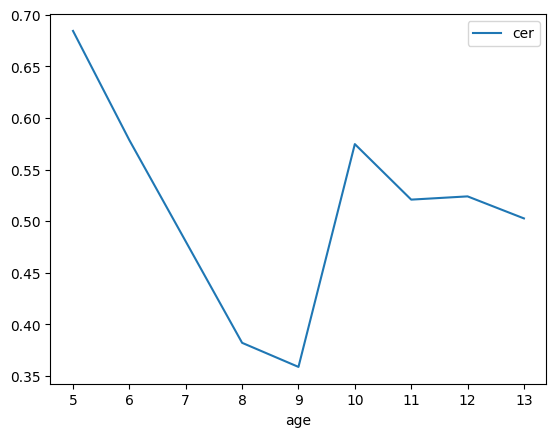

In [74]:
df_cs[['age', 'cer']].groupby('age').mean('cer').plot()

In [75]:
df_cs[['age', 'file_name']].groupby('age').count()

,file_name
age,
5,118
6,221
7,230
8,98
9,143
10,13
11,195
12,232
13,117


### Gender

In [76]:
df_cs[['gender', 'cer']].groupby('gender').mean('cer')

,cer
gender,
female,0.525253
male,0.495970


### Grade Level

In [77]:
df_cs[['grade_level', 'file_name']].groupby('grade_level').count()

,file_name
grade_level,
0,129
1,227
2,338
3,90
4,37
5,95
6,451


<Axes: xlabel='grade_level'>

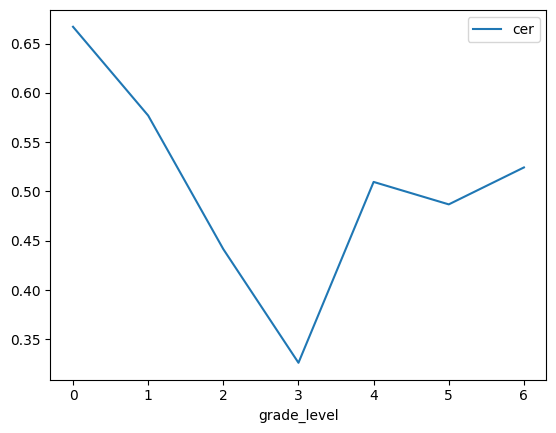

In [78]:
df_cs[['grade_level', 'cer']].groupby('grade_level').mean('cer').plot()

### School Code
School Code is which school the subject's data was collected from
* R = རྡ་སྟེང་བོད་ཁྱིམ་སློབ་གྲྭ
* B = བོད་ཁྱིམ་ཉིན་མོའི་སློབ་གྲྭ
* D = དྷ་ཤོད་བོད་ཁྱིམ་སློབ་གྲྭ
* Y = ཡོངས་གླིང་སློབ་གྲྭ
* P = སྤོན་ཊ་སློབ་གྲྭ
* S = ཤེས་རབ་དགའ་ཚལ་སློབ་གླིང་།
* M = མན་ཇུ་ཤི་རི།
* G = གོ་པལ་པུར་སློབ་གྲྭ
* T = སམ་བྷོ་ཊ་སློབ་གྲྭ
* Z = སུ་ཇཱ་སློབ་གྲྭ
* C = ཅོན་ཏ་ར་བོད་ཁྱིམ་སློབ་གྲྭ
* K = རྒྱུད་སྟོད་གྲྭ་ཚང་།
* N = རྣམ་རྒྱལ་གྲྭ་ཚང་།
* A = ཤུག་གསེབ་ཨ་ནེའི་དགོན་པ།
* L = དགེ་ལྡན་ཆོས་གླིང་།
* X = མེད་པ།

<Axes: xlabel='school_code'>

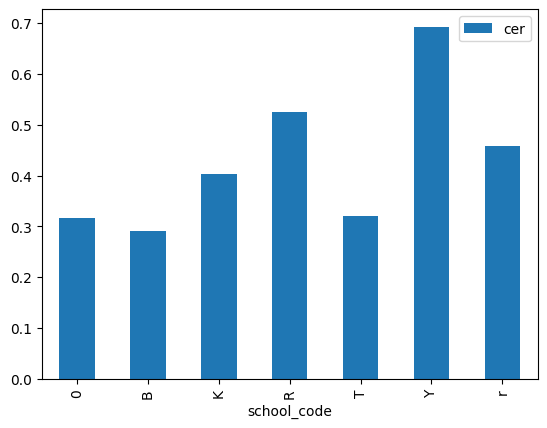

In [79]:
df_cs[['school_code', 'cer']].groupby('school_code').mean('cer').plot.bar()

In [80]:
df_cs[['school_code', 'cer']].groupby('school_code').count()

,cer
school_code,
0,7
B,41
K,10
R,1055
T,104
Y,100
r,50


### Education Years

In [81]:
df_cs[['education_years', 'cer']].groupby('education_years').count()

,cer
education_years,
1,245
2,269
3,218
4,69
5,214
6,101
7,97
8,62
9,92


<Axes: xlabel='education_years'>

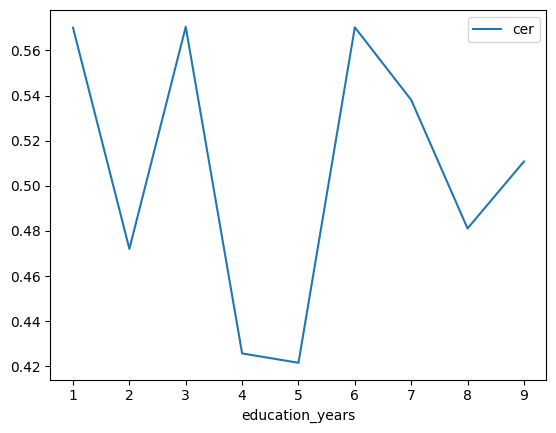

In [82]:
df_cs[['education_years', 'cer']].groupby('education_years').mean('cer').plot()

### Education Type

<Axes: xlabel='education_type'>

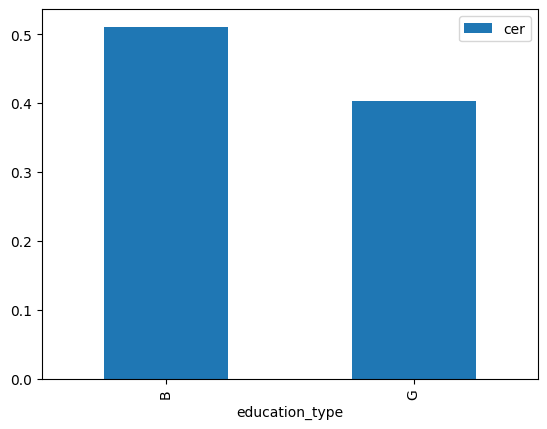

In [83]:
df_cs[['education_type', 'cer']].groupby('education_type').mean('cer').plot.bar()

In [84]:
df_cs[['education_type', 'cer']].groupby('education_type').count()

,cer
education_type,
B,1357
G,10


In [85]:
from transformers import pipeline
import gradio as gr

pipe = pipeline(model="openpecha/wav2vec2_run8")  # change to "your-username/the-name-you-picked"

def transcribe(audio):
    text = pipe(audio)["text"]
    return text

iface = gr.Interface(
    fn=transcribe,
    inputs=gr.Audio(source="microphone", type="filepath"),
    outputs="text",
    title="Whisper Large Tibetan",
    description="Realtime demo for Tibetan speech recognition using a fine-tuned Whisper medium model.",
)

iface.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


### Analyse more in stt.pecha.tools

In [91]:
df['transcript'] = df['inf']
df['reviewed_transcript'] = df['uni']
df['inference_transcript'] = ''
df['group_id'] = 1
df['state'] = "accepted"
df['audio_duration'] = df['cer']
df['transcriber_id'] = 1
df['reviewer_id'] = 2
df['final_reviewer_id'] = 3


In [92]:
df[df['cer'] > 0.9].shape

(826, 19)

In [111]:
# df[df['cer'] > 0.9][['url', 'uni', 'inf', 'cer']].to_csv('cer-0.9.tsv', sep='\t', index=False)

df_bad = df[df['cer'] > 0.9][['file_name','url','inference_transcript','transcript','reviewed_transcript','audio_duration','group_id','state','transcriber_id','reviewer_id','final_reviewer_id']]

df_bad.to_csv('cer-0.9.csv')

In [112]:
df_bad['transcript'] = df_bad.apply(lambda row: row['transcript'][:500], axis=1)

In [113]:
df_bad['transcript'].str.len().describe()

count    826.000000
mean     315.865617
std      156.575574
min        6.000000
25%      186.750000
50%      326.500000
75%      485.750000
max      500.000000
Name: transcript, dtype: float64

In [116]:
df_bad.drop_duplicates(subset='file_name', keep="first", inplace=True)

In [117]:
df_bad.to_csv('cer-0.9.csv')

In [118]:
df_bad[df_bad['file_name'] ==  'STT_CS-L-2010_2010-P_P-D_D-B09_B07-6_6-R_R-01_0121_970169_to_978699.mp3']

,file_name,url,inference_transcript,transcript,reviewed_transcript,audio_duration,group_id,state,transcriber_id,reviewer_id,final_reviewer_id
3741,STT_CS-L-2010_2010-P_P-D_D-B09_B07-6_6-R_R-01_...,https://d38pmlk0v88drf.cloudfront.net/stt_pech...,,ལཱ་ལོ༎ལགས་སོ་རྒན་ལགས་ལ་ཨ་ནས་མགྱོགས་ཙི་མདུན་མ་མ...,བལྟ་ལོ། ལགས་སོ་ཐུགས་ཆེ་གནང་། འགྲོ། བྷོལ་དེ་ལ་ག...,0.909091,1,accepted,1,2,3


In [45]:
df_cs[df_cs['cer'] > 0.8]['file_name'].to_csv('cer-0.9.txt', index=False)

In [46]:
df_cs[df_cs['cer'] > 0.8][['file_name','url','transcript','reviewed_transcript']].to_csv('cer-0.9.csv')

In [47]:
df_cs[df_cs['cer'] < 0.1][['url', 'uni', 'inf', 'cer']].to_csv('cer-0.1.tsv', sep='\t', index=False)

In [48]:
df_cs[df_cs['file_name'].isin([
    'STT_TT00144_01232.950-01234.050',
    
    'STT_CS-D-2014-M-D-B01-3-R-03_0019_136172_to_139547',
    'STT_CS-L-2017_2017-P_P-D_D-B01_B01-1_1-R_R-03_0139_1611503_to_1621020',
    'STT_CS-D-2012-P-D-B04-5-R-01_0086_736163_to_745697',
    
    'STT_AB00233_0315_3763228_to_3772352',
    'STT_AB00250_0191_1536177_to_1548643',
    'STT_AB00255_0197_1588506_to_1600406'
    
    'STT_MV0081_0176_1408521_to_1412238',
    'STT_MV0008_0130_957881_to_967209',
])]

,file_name,uni,wylie,url,dept,grade,char_len,audio_len,inf,cer,...,school_code,transcript,reviewed_transcript,inference_transcript,group_id,state,audio_duration,transcriber_id,reviewer_id,final_reviewer_id
